# Part 2: Data Exercise

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import openpyxl as px

## 1.

In [96]:
#Lets read cps09mar xlsx file
df = pd.read_excel('cps09mar.xlsx')


In [97]:
df.head()

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1


In [98]:
df.education.value_counts()

education
12    13896
16    11640
13     9254
14     5608
18     4670
20     1875
11     1304
6       602
9       575
10      565
8       424
4       256
0        73
Name: count, dtype: int64

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Load the dataset
# Assuming you have loaded the cps09mar dataset as a DataFrame named 'df'
# df = pd.read_csv("path_to_cps09mar.csv")  # Modify as needed

# Filter the dataset for education levels 16, 18, and 20
education_levels = [16, 18, 20]
dfs = {level: df[df['education'] == level] for level in education_levels}


In [100]:
import numpy as np
from scipy.integrate import quad

# Define the Epanechnikov kernel function with u^2 term for integration
def epanechnikov_kernel(u):
    if abs(u) <= np.sqrt(5):
        return (3 / (4 * np.sqrt(5))) * (1 - u**2 / 5)
    else:
        return 0


In [101]:
# Define a function to calculate kappa_2 for Epanechnikov kernel
def epanechnikov_kappa2():
    def integrand(u):
        return u**2 * epanechnikov_kernel(u)
    kappa2, _ = quad(integrand, -np.sqrt(5), np.sqrt(5))
    return kappa2

# Compute kappa_2 by integrating u^2 * K(u) over the range -sqrt(5) to sqrt(5)
kappa_2 = epanechnikov_kappa2()

print(f"The calculated value of kappa_2 for the Epanechnikov kernel is: {kappa_2}")


The calculated value of kappa_2 for the Epanechnikov kernel is: 1.0


In [102]:
# Define a function for plug-in bandwidth selection with Epanechnikov kernel
def epanechnikov_bandwidth(data):
    sigma = np.std(data)
    n = len(data)
    R_K = 3 * np.sqrt(5) / 25  # R(K) for Epanechnikov kernel from the table
    kappa_2 = epanechnikov_kappa2()  # Calculate kappa_2 for Epanechnikov kernel

    h_rot = sigma * ((8 * np.sqrt(np.pi) * R_K) / (3 * kappa_2 ** 2)) ** (1/5) * n ** (-1/5)
    return h_rot


In [103]:
# Define the density estimation function using the formula
def kernel_density_estimate(x_points, data, h):
    n = len(data)
    density = np.zeros_like(x_points)
    
    for i, x0 in enumerate(x_points):
        # Sum over all data points
        density[i] = np.sum([epanechnikov_kernel((x - x0) / h) for x in data]) / (n * h)
    
    return density

In [104]:

# Prepare x-axis points for plotting
x_d = np.linspace(min(np.log(df['earnings'])), max(np.log(df['earnings'])), 1000)

# Dictionary to store densities and bandwidths
densities = {}
bandwidths = {}

# Calculate density estimates for each education level
for level in education_levels:
    data = np.log(dfs[level]['earnings'].values)  # Logarithm of earnings
    h = epanechnikov_bandwidth(data)  # Calculate bandwidth for each education level
#Estimating the density of logarithm earning of individuals of education 16, 18 and 20
    density = kernel_density_estimate(x_d, data, h)
    
    densities[level] = density
    bandwidths[level] = h
    print(f"Education level {level}: Bandwidth (h_rot) = {h:.4f}")


Education level 16: Bandwidth (h_rot) = 0.1073
Education level 18: Bandwidth (h_rot) = 0.1202
Education level 20: Bandwidth (h_rot) = 0.1885


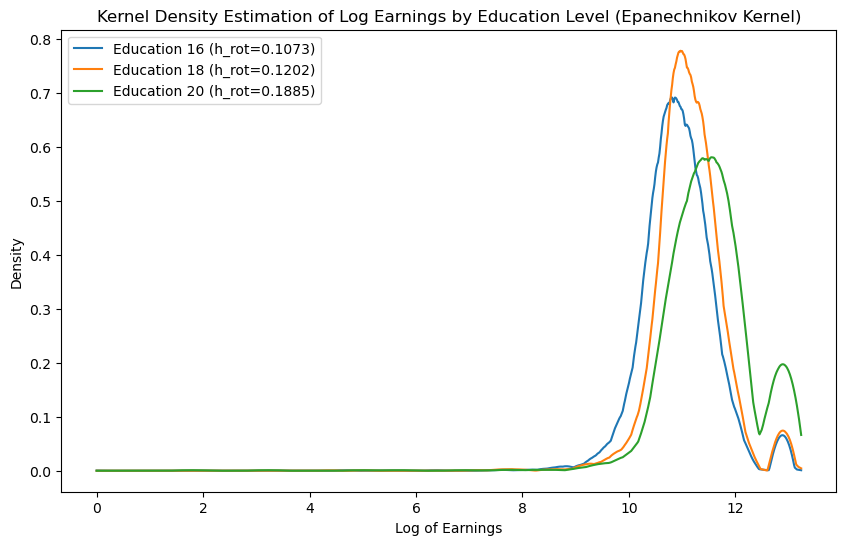

In [107]:

# Plot the kernel density estimators
plt.figure(figsize=(10, 6))

for level in education_levels:
    plt.plot(x_d, densities[level], label=f'Education {level} (h_rot={bandwidths[level]:.4f})')

# Add labels and legend
plt.xlabel('Log of Earnings')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Log Earnings by Education Level (Epanechnikov Kernel)')
plt.legend()
plt.show()

In [110]:
#Lets check if there is a cap for log earnings by education level
df['log_earnings'] = np.log(df['earnings'])
df.groupby('education')['log_earnings'].max()


education
0     11.350407
4     11.438611
6     11.918391
8     12.206073
9     11.512925
10    12.986463
11    13.237631
12    13.223271
13    13.223271
14    13.143786
16    13.223271
18    13.223271
20    13.223271
Name: log_earnings, dtype: float64

### Findings on Education Levels (16, 18, and 20)

1. **Higher Peaks with More Education**:
   - The **peak of each distribution** shifts higher as education increases, showing that people with more education tend to have higher wages, with doctorate having a bigger dispersion. This suggests a positive link between education and earnings.

2. **Potential Wage Cap**:
   - There’s a **bump at the upper end** of each distribution, which might indicate a **wage cap** common in survey data. Such caps often limit the highest reported wages, potentially underestimating the true earnings for the most educated individuals.

In summary, higher education levels are associated with higher, more concentrated wages, while the bump at the end suggests survey limitations at the upper wage range.

## Part 2

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Load the SP500 dataset (replace with actual path)
df = pd.read_csv("SP500-1.csv")


In [112]:
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000
1,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000
2,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000
3,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000
4,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000


In [113]:


# Calculate continuous compounding (cc) returns
df['cc_returns'] = np.log(df['AdjClose'] / df['AdjClose'].shift(1))
cc_returns = df['cc_returns'].dropna()  # Remove NaN values from the first row


In [114]:

# Part (a): Calculate sample mean and standard deviation
mean_cc = np.mean(cc_returns)
std_cc = np.std(cc_returns)
print(f"Sample Mean: {mean_cc:.4f}, Sample Standard Deviation: {std_cc:.4f}")


Sample Mean: 0.0001, Sample Standard Deviation: 0.0123


The PDF for a normal distribution with mean $ \mu $ and standard deviation $  \sigma  $ at a point $  x  $ is given by:

$$ 
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
 $$


In [115]:
def normal_density_estimate_formula(x_values, mean, std_dev):
 normal =  (1 / (np.sqrt(2 * np.pi * std_dev**2))) * np.exp(-((x_values - mean)**2) / (2 * std_dev**2))
 return normal


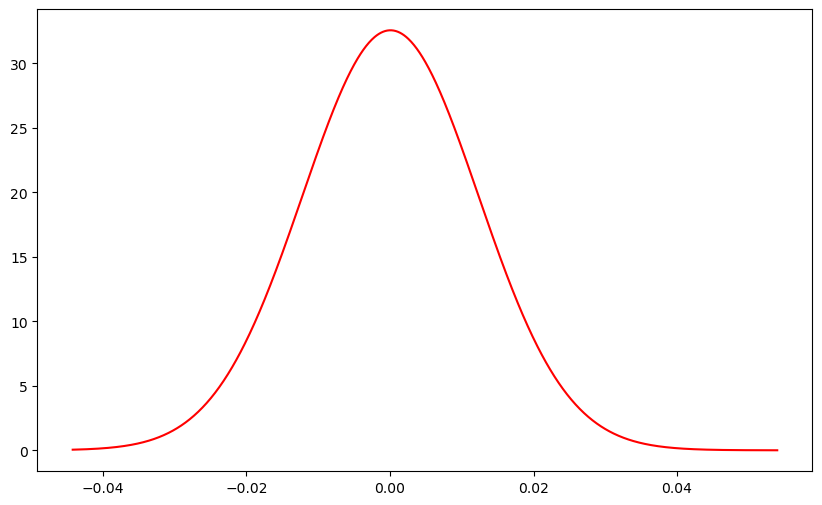

In [116]:

# Density estimation under the normal assumption
x_values = np.linspace(cc_returns.min(), cc_returns.max(), 1000)
normal_density = normal_density_estimate_formula(x_values, mean_cc, std_cc)

# Plot the normal distribution density
plt.figure(figsize=(10, 6))
plt.plot(x_values, normal_density, label="Normal Density (Mean & Std Dev)", color='red')


In [117]:

# Evaluate the KDE
bandwidth = epanechnikov_bandwidth(cc_returns.values)
kde_density = kernel_density_estimate(x_values, cc_returns.values, bandwidth)
print(f"Epanechnikov Bandwidth: {bandwidth:.4f}")


Epanechnikov Bandwidth: 0.0037


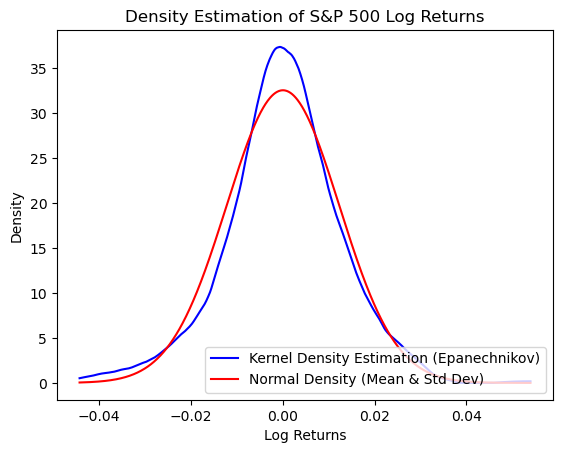

In [118]:
#Lets plot the normal density and the KDE
plt.plot(x_values, kde_density, label="Kernel Density Estimation (Epanechnikov)", color='blue')
plt.plot(x_values, normal_density, label="Normal Density (Mean & Std Dev)", color='red')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.title('Density Estimation of S&P 500 Log Returns')
plt.legend(loc = 'lower right')
plt.show()

In [119]:
#Lets test the kurtosis of the log returns
kurtosis = cc_returns.kurtosis()
print(f"Kurtosis of Log Returns: {kurtosis+3:.4f}")
if kurtosis > 0:
    print("The distribution is leptokurtic.")
elif kurtosis < 0:
    print("The distribution is platykurtic.")

Kurtosis of Log Returns: 4.3984
The distribution is leptokurtic.


In [120]:
#Lets also do a Kolmogorov-Smirnov test
from scipy.stats import kstest
test = kstest(cc_returns, 'norm')
print(f"Kolmogorov-Smirnov Test Statistic: {test.statistic:.4f}")
print(f"Kolmogorov-Smirnov Test P-Value: {test.pvalue:.4f}")
if test.pvalue > 0.05:
    print("The null hypothesis that the data is normally distributed cannot be rejected.")
else:
    print("The null hypothesis that the data is normally distributed is rejected.")
    


Kolmogorov-Smirnov Test Statistic: 0.4858
Kolmogorov-Smirnov Test P-Value: 0.0000
The null hypothesis that the data is normally distributed is rejected.


The kernel density estimate shows that log returns have fatter tails compared to the normal distribution. This is typical in financial data, where extreme values (far from the mean) occur more frequently due to unusual market events. The tests indicate that the log returns did not follow a normal distribution.

The sharper peak at the center of the kernel estimate indicates that most returns are close to the mean, with a higher concentration around typical values than the normal distribution suggests. Overall, this pattern reflects the heavy-tailed, peaked nature of financial returns, which the normal distribution doesn’t fully capture

### B)

In [144]:
# Function to calculate sigma_hat^2(x0) for each point in x_points
def variance_estimate(x_points, data, h):
    n = len(data)
    variances = np.zeros_like(x_points)
    
    for i, x0 in enumerate(x_points):
        K_h_values = [epanechnikov_kernel((x - x0) / h) for x in data]/h
        
        # Calculate term1 and term2 for the variance estimation
        term1 = (1 /( n)) * sum(k**2 for k in K_h_values)
        term2 = ((1 / (n)) * sum(K_h_values)) ** 2
        
        # Variance estimate using the formula provided
        variances[i] = (term1 - term2) / n
    
    return variances

In [145]:
# Define parameters and data for evaluation
alpha = 0.05  # Confidence level
x_values = np.linspace(cc_returns.min(), cc_returns.max(), 1000)  # Points at which to evaluate
h = epanechnikov_bandwidth(cc_returns.values)  # Use plug-in bandwidth as before


In [146]:
import scipy.stats as stats
# Calculate density estimates and variance estimates across x_values
density_estimates = kernel_density_estimate(x_values, cc_returns.values, h)
variance_estimates = variance_estimate(x_values, cc_returns.values, h)

# Calculate the z-score for the given confidence level
z_alpha = stats.norm.ppf(1 - alpha / 2)

# Calculate the lower and upper bounds of the confidence interval
lower_bounds = density_estimates - z_alpha * np.sqrt(variance_estimates)
upper_bounds = density_estimates + z_alpha * np.sqrt(variance_estimates)


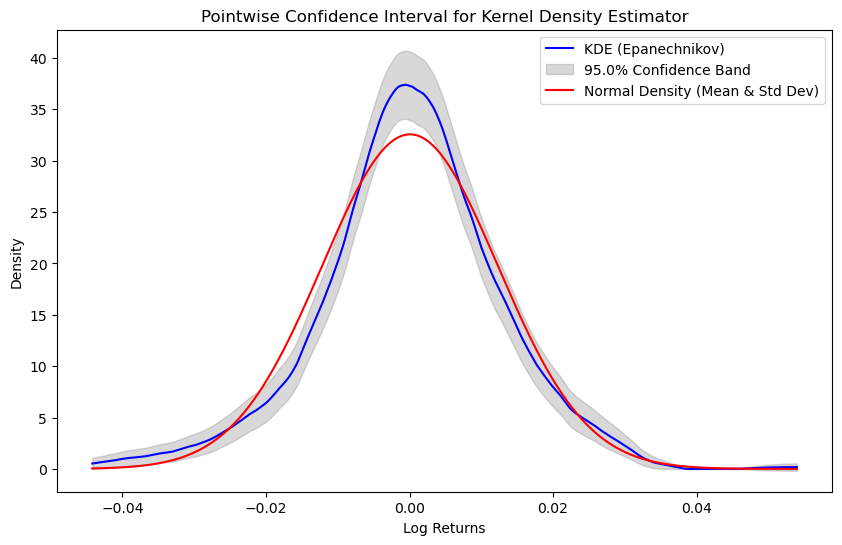

In [147]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, density_estimates, label="KDE (Epanechnikov)", color='blue')
plt.fill_between(x_values, lower_bounds, upper_bounds, color='gray', alpha=0.3, label=f'{100*(1-alpha)}% Confidence Band')
#Lets also add with normal density
plt.plot(x_values, normal_density, label="Normal Density (Mean & Std Dev)", color='red')
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.title("Pointwise Confidence Interval for Kernel Density Estimator")
plt.legend()
plt.show()

The 95% confidence band shows that the normal distribution overestimates the probability of moderate deviations from the mean, implying more frequent values near zero (but not 0) than the data actually supports. The normal distribution also fails to represent the high probability of the log return to be at the mean, 0. Also, at the extreme tails, the normal distribution underestimates the likelihood of rare, extreme returns, missing the heavier tails captured by the KDE.

This highlights that the normal distribution fails to fully represent the log returns data, particularly in terms of capturing the high concentration around the mean and the higher probability of extreme outcomes. Additionally, the KDE suggests greater probability for extreme negative returns and a sharper peak at zero, underscoring the limitations of assuming normality in financial return data.